In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
# from tensorflow_examples.models.pix2pix import pix2pix
import pix2pix_128
import time
import cv2
import matplotlib.pyplot as plt

/Users/miguelcece/.local/share/virtualenvs/Cyclegan-CcYj8nOo/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Define paths `to your dataset
trainA_path = '/Users/miguelcece/Downloads/archive/Images/Images/glasses'
trainB_path = '/Users/miguelcece/Downloads/archive/Images/Images/no_glasses'
testA_path = '/Users/miguelcece/Downloads/archive/Images/Images/glasses'
testB_path = '/Users/miguelcece/Downloads/archive/Images/Images/no_glasses'

# Function to load and preprocess images
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = (image / 127.5) - 1  # Normalize to [-1, 1]
    return image

# Create datasets
trainA_ds = tf.data.Dataset.list_files(trainA_path + '/*.jpg')
trainB_ds = tf.data.Dataset.list_files(trainB_path + '/*.jpg')
testA_ds = tf.data.Dataset.list_files(testA_path + '/*.jpg')
testB_ds = tf.data.Dataset.list_files(testB_path + '/*.jpg')

# Map the load_image function to datasets
trainA_ds = trainA_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
trainB_ds = trainB_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
testA_ds = testA_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
testB_ds = testB_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Define batch size and shuffle buffer size
BATCH_SIZE = 1
SHUFFLE_BUFFER_SIZE = 1000

# Shuffle, batch, and prefetch datasets
trainA_ds = trainA_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
trainB_ds = trainB_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
testA_ds = testA_ds.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
testB_ds = testB_ds.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [3]:

train_horses, train_zebras = trainA_ds, trainB_ds
test_horses, test_zebras = testA_ds, testB_ds

In [4]:
CHANNELS = 3
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 128
IMG_HEIGHT = 128

In [5]:

# 128x128 input version
generator_g = pix2pix_128.generator(norm_type='instancenorm')
generator_f = pix2pix_128.generator(norm_type='instancenorm')

discriminator_x = pix2pix_128.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix_128.discriminator(norm_type='instancenorm', target=False)

# 256x256 input version
# generator_g = pix2pix.unet_generator(CHANNELS, norm_type='instancenorm')
# generator_f = pix2pix.unet_generator(CHANNELS, norm_type='instancenorm')

# discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
# discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

In [6]:
from cyclegan import Cyclegan
from preprocess import Preprocess

In [7]:
cyclegan = Cyclegan(
    generator_g, 
    generator_f, 
    discriminator_x, 
    discriminator_y
)

In [ ]:
sample_horse = next(iter(train_horses))
sample_zebra = next(iter(train_zebras))

def show_result():
    to_zebra = generator_f(sample_horse)
    to_horse = generator_g(sample_zebra)
    plt.figure(figsize=(8, 8))
    contrast = 8

    imgs = [sample_horse, to_zebra, sample_zebra, to_horse]
    title = ['glasses', 'To non glasses', 'non glasses', 'To almost glasses']

    for i in range(len(imgs)):
        plt.subplot(2, 2, i+1)
        plt.title(title[i])
        if i % 2 == 0:
            plt.imshow(imgs[i][0] * 0.5 + 0.5)
        else:
            plt.imshow(imgs[i][0] * 0.5 + 0.5)
    plt.show()
    
show_result()

In [12]:
cyclegan.train_n_epochs(train_horses, train_zebras, 1)

Start training for 1 epochs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [09:34<00:00, 574.15s/it]


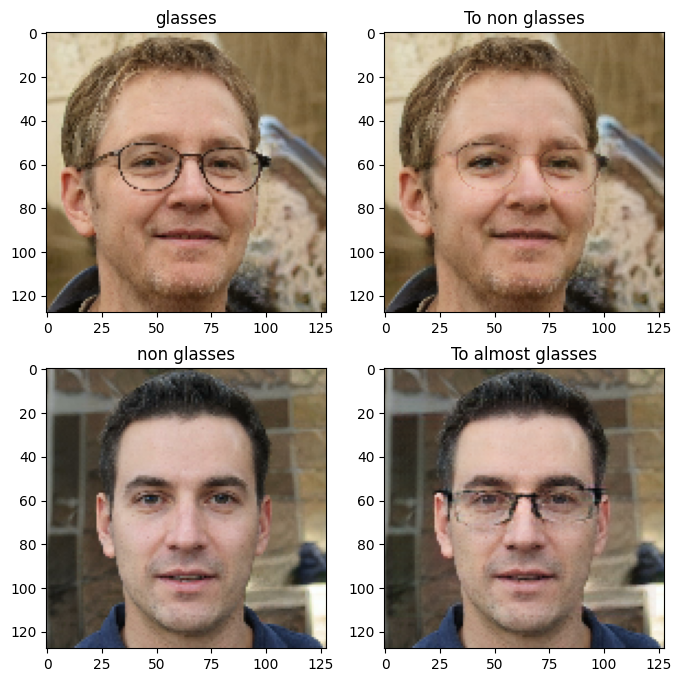

In [15]:
show_result()

In [11]:
cyclegan.checkpoint_saver()

checkpoint saved in ./checkpoints/train
